In [80]:

import pandas as pd
import numpy as np
import os
import json
from patchify import patchify
import tifffile as tiff

from PIL import Image,ImageDraw
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

import cv2

In [81]:
path = r'[Your Path]'
DIR = os.listdir(r'[Directory Path]')

In [82]:
image_path = path + DIR[9]
json_path = path + DIR[8]

In [83]:
def fetch_polygon_points(json_file_path):
    with open(json_file_path) as f:
        data = json.load(f)
        
    PoligonList = []
    
    print(f"Number of Polygons shape : {len(data['shapes'])}")
    for i in range(len(data['shapes'])):
        polygons = data['shapes'][i]['points']  # Assuming 'points' is the key in JSON that holds polygon data
        PoligonList.append(len(polygons))  
        print(f"Polygin {i+1} coordinate  points {len(polygons)}")
    
        for polygon in polygons:
            points = polygon
            for point in points:
                x = point
    return PoligonList

# Provide the path to your JSON file

list_max = fetch_polygon_points(json_path)
print(f"Max Pooligon size = {max(list_max)}")


Number of Polygons shape : 51
Polygin 1 coordinate  points 78
Polygin 2 coordinate  points 64
Polygin 3 coordinate  points 10
Polygin 4 coordinate  points 47
Polygin 5 coordinate  points 25
Polygin 6 coordinate  points 37
Polygin 7 coordinate  points 49
Polygin 8 coordinate  points 57
Polygin 9 coordinate  points 13
Polygin 10 coordinate  points 37
Polygin 11 coordinate  points 16
Polygin 12 coordinate  points 119
Polygin 13 coordinate  points 149
Polygin 14 coordinate  points 25
Polygin 15 coordinate  points 52
Polygin 16 coordinate  points 32
Polygin 17 coordinate  points 16
Polygin 18 coordinate  points 8
Polygin 19 coordinate  points 17
Polygin 20 coordinate  points 12
Polygin 21 coordinate  points 19
Polygin 22 coordinate  points 37
Polygin 23 coordinate  points 71
Polygin 24 coordinate  points 41
Polygin 25 coordinate  points 19
Polygin 26 coordinate  points 14
Polygin 27 coordinate  points 134
Polygin 28 coordinate  points 10
Polygin 29 coordinate  points 46
Polygin 30 coordinat

In [84]:
def createDataFrame(json_file_path):
    with open(json_file_path) as f:
        data = json.load(f)
    
    # for keys in the image    
    print(data.keys())
    print(len(data['shapes']))
   
    
    data_list = []
    for row in range(len(data['shapes'])):
        polygons = data['shapes'][row]['points']
        data_list.append(polygons)

    datadf = pd.DataFrame(data_list)
    
    return datadf
    
# Provide the path to your JSON file

datadf = createDataFrame(json_path)



dict_keys(['version', 'flags', 'shapes', 'lineColor', 'fillColor', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])
51


In [85]:
datadf.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 149 columns):
 #    Column  Dtype 
---   ------  ----- 
 0    0       object
 1    1       object
 2    2       object
 3    3       object
 4    4       object
 5    5       object
 6    6       object
 7    7       object
 8    8       object
 9    9       object
 10   10      object
 11   11      object
 12   12      object
 13   13      object
 14   14      object
 15   15      object
 16   16      object
 17   17      object
 18   18      object
 19   19      object
 20   20      object
 21   21      object
 22   22      object
 23   23      object
 24   24      object
 25   25      object
 26   26      object
 27   27      object
 28   28      object
 29   29      object
 30   30      object
 31   31      object
 32   32      object
 33   33      object
 34   34      object
 35   35      object
 36   36      object
 37   37      object
 38   38      object
 39   39      object
 40   40      

In [86]:
datadf.columns = datadf.columns.rename('Coordinates')

In [87]:
datadf

Coordinates,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,148
0,"[741.7741935483871, 357.5268817204301]","[733.1720430107526, 374.19354838709677]","[732.0967741935483, 390.3225806451613]","[738.5483870967741, 392.47311827956986]","[723.494623655914, 396.2365591397849]","[709.516129032258, 402.1505376344086]","[690.6989247311827, 420.43010752688167]","[681.5591397849462, 433.3333333333333]","[682.6344086021505, 447.31182795698925]","[683.7096774193548, 465.05376344086017]",...,None,None,None,None,None,None,None,None,None,None
1,"[884.7849462365591, 428.494623655914]","[891.7741935483871, 411.8279569892473]","[901.4516129032259, 405.3763440860215]","[909.516129032258, 398.38709677419354]","[928.8709677419354, 375.80645161290323]","[934.7849462365591, 351.6129032258064]","[947.6881720430106, 335.4838709677419]","[967.0430107526881, 310.752688172043]","[990.1612903225805, 288.7096774193548]","[1010.5913978494623, 272.5806451612903]",...,None,None,None,None,None,None,None,None,None,None
2,"[1013.2795698924731, 335.4838709677419]","[1004.1397849462364, 347.31182795698925]","[1002.5268817204301, 358.06451612903226]","[1010.5913978494623, 360.752688172043]","[1026.1827956989246, 355.3763440860215]","[1036.3978494623655, 350.5376344086021]","[1039.6236559139784, 339.247311827957]","[1035.8602150537633, 325.80645161290323]","[1028.8709677419354, 325.80645161290323]","[1020.8064516129032, 330.64516129032256]",...,None,None,None,None,None,None,None,None,None,None
3,"[818.1182795698924, 263.9784946236559]","[812.2043010752689, 280.1075268817204]","[811.1290322580644, 297.84946236559136]","[822.4193548387095, 310.21505376344084]","[839.0860215053763, 307.5268817204301]","[847.1505376344085, 297.31182795698925]","[849.8387096774193, 288.17204301075265]","[868.1182795698924, 282.79569892473114]","[879.9462365591398, 268.2795698924731]","[890.1612903225805, 254.83870967741933]",...,None,None,None,None,None,None,None,None,None,None
4,"[740.6989247311827, 578.494623655914]","[722.4193548387096, 591.3978494623656]","[714.3548387096773, 603.763440860215]","[706.2903225806451, 622.0430107526881]","[705.2150537634408, 637.6344086021505]","[711.6666666666666, 645.1612903225806]","[720.8064516129032, 651.0752688172042]","[732.6344086021505, 655.3763440860215]","[755.752688172043, 648.3870967741935]","[789.0860215053763, 632.258064516129]",...,None,None,None,None,None,None,None,None,None,None
5,"[886.9354838709676, 580.1075268817204]","[884.247311827957, 596.236559139785]","[871.3440860215053, 604.3010752688172]","[855.752688172043, 612.9032258064516]","[845.0, 623.1182795698925]","[824.5698924731182, 636.0215053763441]","[810.5913978494623, 645.6989247311827]","[791.236559139785, 651.0752688172042]","[773.494623655914, 661.8279569892472]","[753.0645161290322, 664.516129032258]",...,None,None,None,None,None,None,None,None,None,None
6,"[493.92473118279565, 318.2795698924731]","[518.6559139784946, 331.72043010752685]","[531.0215053763441, 336.55913978494624]","[540.6989247311827, 344.6236559139785]","[528.3333333333333, 351.6129032258064]","[521.3440860215053, 359.6774193548387]","[498.2258064516128, 384.9462365591398]","[496.07526881720423, 398.92473118279565]","[495.5376344086021, 416.1290322580645]","[493.38709677419354, 432.79569892473114]",...,None,None,None,None,None,None,None,None,None,None
7,"[700.3763440860215, 64.51612903225806]","[698.2258064516128, 89.24731182795698]","[699.3010752688172, 110.75268817204301]","[712.2043010752687, 113.9784946236559]","[718.6559139784946, 126.88172043010752]","[726.1827956989247, 145.16129032258064]","[751.4516129032257, 146.23655913978493]","[767.0430107526881, 146.7741935483871]","[801.4516129032259, 137.09677419354838]","[837.4731182795699, 117.20430107526882]",...,None,None,None,None,None,None,None,None,None,None
8,"[1054.1397849462364, 480.64516129032256]","[1043.9247311827955, 489.247311827957]","[1040.1612903225805, 500.0]","[1040.1612903225805, 512.3655913978495]","[1046.0752688172042, 526

In [88]:
tiff_file_path = path + DIR[3]
image_stack = tiff.imread(tiff_file_path)

In [89]:
print(image_stack.shape)

(1024, 1360, 3)


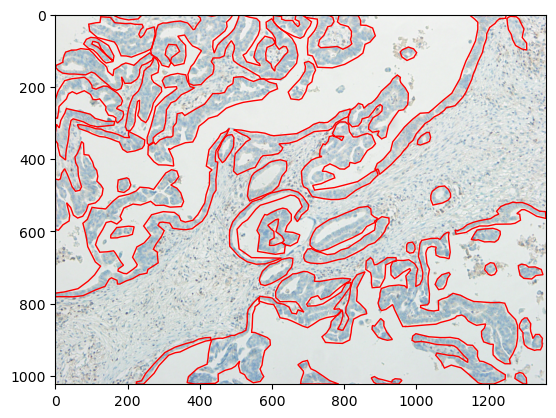

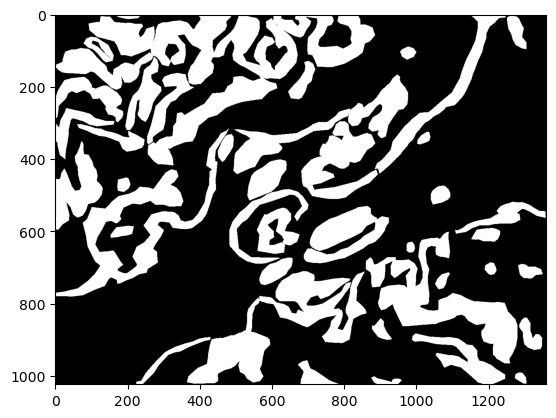

In [90]:

def map_polygons_on_image_and_mask(image_path, json_path):
    # Load the image
    image = Image.open(image_path)
    image_array = np.array(image)

    # Read the JSON file
    with open(json_path) as file:
        data = json.load(file)

        # Assuming 'polygons' is the key containing an array of polygons
        polygons = [shape['points'] for shape in data['shapes']]
        
        # Create a figure and axes
        fig, ax = plt.subplots()
        
        # Create an empty mask
        mask = np.zeros_like(image_array[:, :, 0])

        # Display the image
        ax.imshow(image)

        # Iterate over each polygon
        for points in polygons:
            # Create a polygon patch
            poly_patch = Polygon(points, closed=True, edgecolor='r', facecolor='none')
            poly_patch2 = Polygon(points, closed=True)

            # Add the polygon patch to the axes
            ax.add_patch(poly_patch)
            
            # Get the coordinates within the polygon
            grid = np.meshgrid(np.arange(image_array.shape[1]), np.arange(image_array.shape[0]))
            points_mask = np.vstack((grid[0].flatten(), grid[1].flatten())).T
            mask_indices = points_mask[poly_patch2.contains_points(points_mask)].astype(int)

            # Update the mask with the polygon region
            mask[mask_indices[:, 1], mask_indices[:, 0]] = 255

        # Show the image with polygons
        plt.show()
    return mask

# Example usage
segmented_mask = map_polygons_on_image_and_mask(image_path, json_path)

# Display the segmented mask
plt.imshow(segmented_mask, cmap='gray')
plt.show()
